## Importing All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import time
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. GOOGLE (GOOGL) Stock Price Dataset

In [2]:
df = yf.download('GOOGL', start='2004-08-19', end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2004-08-19 00:00:00+00:00,2.504808,2.511011,2.604104,2.401401,2.502503,893181924
2004-08-20 00:00:00+00:00,2.703765,2.710460,2.729730,2.515015,2.527778,456686856
2004-08-23 00:00:00+00:00,2.730975,2.737738,2.839840,2.728979,2.771522,365122512
2004-08-24 00:00:00+00:00,2.617892,2.624374,2.792793,2.591842,2.783784,304946748
2004-08-25 00:00:00+00:00,2.646101,2.652653,2.702703,2.599600,2.626627,183772044


In [4]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2024-11-20 00:00:00+00:00,175.979996,175.979996,177.679993,173.779999,177.339996,18997100
2024-11-21 00:00:00+00:00,167.630005,167.630005,174.130005,163.699997,173.899994,59734400
2024-11-22 00:00:00+00:00,164.759995,164.759995,166.460007,163.899994,165.850006,38604600
2024-11-25 00:00:00+00:00,167.649994,167.649994,168.630005,165.610001,166.089996,33090900
2024-11-26 00:00:00+00:00,169.679993,169.679993,169.820007,167.649994,167.649994,10581807


In [5]:
df.duplicated().sum()

0

In [6]:
df.columns = df.columns.get_level_values(0)

## Copying the dataset for future use

In [7]:
df1 = df.copy()
df1.reset_index(inplace=True)

In [8]:
df.reset_index(drop=True, inplace=True)

### Dropping unwanted column

In [9]:
df.drop(['Adj Close'], axis=1, inplace=True)

### Splitting into features and target

In [10]:
X = df.drop(['Close'], axis=1)
y = df['Close']

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

### Splitting the data into train and test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building using Random Forest Regression



In [13]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print('Training Time:', end-start)

Training Time: 4.722823858261108


In [14]:
model.score(X_train, y_train)

0.9999729984178732

In [15]:
predicted = model.predict(X_test)
predicted

array([129.72581804,  12.01464391,  11.9332992 , ...,  11.474996  ,
        12.14932203,   7.12804335])

In [16]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
for a in prediction.index:
    for b in df1.index:
        if a == b:
            prediction['Date'] = df1['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2004-08-31 00:00:00+00:00,2.561812,2.558386
2004-09-07 00:00:00+00:00,2.542042,2.523472
2004-09-14 00:00:00+00:00,2.790040,2.680351
2004-09-16 00:00:00+00:00,2.852102,2.816100
2004-09-22 00:00:00+00:00,2.962462,2.965894
...,...,...
2024-10-22 00:00:00+00:00,165.139999,164.088364
2024-11-18 00:00:00+00:00,175.300003,174.410920
2024-11-21 00:00:00+00:00,167.630005,168.462134


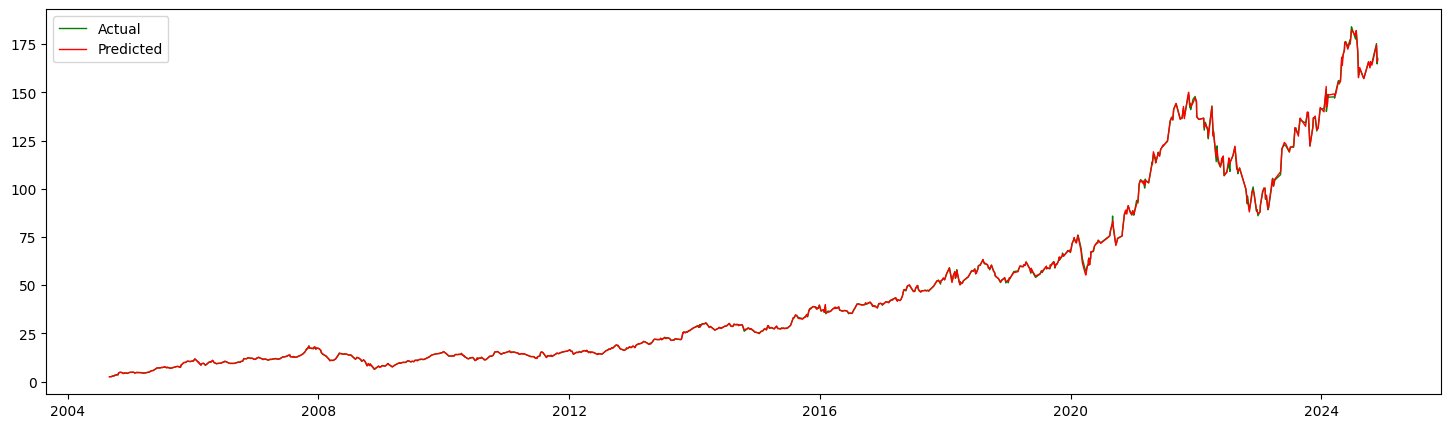

In [17]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()

In [18]:
model.predict(scaler.transform([[165.86, 167.65, 165.24, 3621520]]))

array([166.34913086])

In [19]:
df1[df1.Date == '2004-09-01']

Price,Date,Adj Close,Close,High,Low,Open,Volume
9,2004-09-01 00:00:00+00:00,2.502562,2.508759,2.576827,2.494244,2.57007,182765052


In [20]:
model.predict(scaler.transform([[2.57007, 2.576827, 2.494244, 182765052]]))

array([2.55313607])

## Calculating the Performance Evaluation Metrics

In [21]:
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.2887707084928389
Root Mean Squared Error: 0.5373739000852562
Mean Absolute Error: 0.2786086344104483


### Here the performance metrics are too much higher so, we have to tune the hyperparameters.

In [22]:
model_params = {
    'n_estimators': [5, 10, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    }

grid_search = GridSearchCV(RandomForestRegressor(random_state=42, bootstrap = False),
                           model_params, cv=5, return_train_score=False)
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print('Training Time:', end-start)

Training Time: 888.3953742980957


In [23]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [24]:
grid_search.best_score_

0.9997906352906156

In [25]:
grid_search_prediction = grid_search.predict(X_test)
grid_search_prediction

array([129.5021286 ,  12.01432705,  11.90934682, ...,  11.39151645,
        12.10335336,   7.03165682])

In [26]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': grid_search_prediction})
for a in prediction.index:
    for b in df1.index:
        if a == b:
            prediction['Date'] = df1['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2004-08-31 00:00:00+00:00,2.561812,2.533712
2004-09-07 00:00:00+00:00,2.542042,2.533712
2004-09-14 00:00:00+00:00,2.790040,2.676020
2004-09-16 00:00:00+00:00,2.852102,2.950200
2004-09-22 00:00:00+00:00,2.962462,2.950200
...,...,...
2024-10-22 00:00:00+00:00,165.139999,164.625004
2024-11-18 00:00:00+00:00,175.300003,173.842499
2024-11-21 00:00:00+00:00,167.630005,164.625004


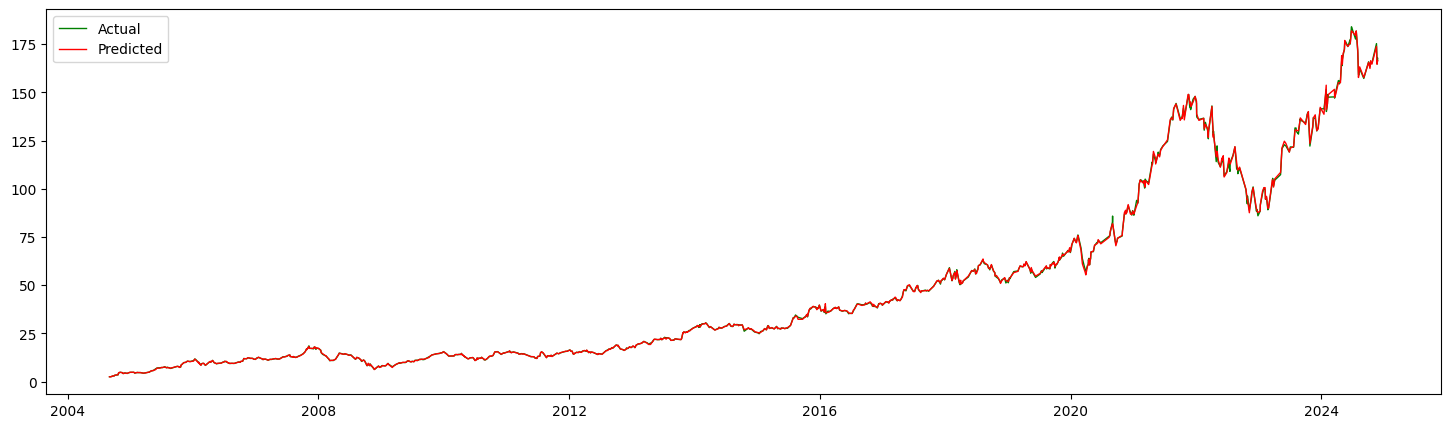

In [27]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()

### Performance Evaluation Metrics after Hyperparameter Tuning

In [28]:
mse = mean_squared_error(y_test, grid_search_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, grid_search_prediction)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.40606208863839566
Root Mean Squared Error: 0.6372300123490698
Mean Absolute Error: 0.3276726790997167
